# How to Create a Seller Financing Calculator
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1uTFN5JQ1LnLXbQg0XwTG0xULoBOYEScr?usp=sharing)

## Overview
| Detail Tag            | Information                                                                                        |
|-----------------------|----------------------------------------------------------------------------------------------------|
| Originally Created By | Ariel Herrera arielherrera@analyticsariel.com |
| External References   | API |
| Input Datasets        | Source name |
| Output Datasets       | Source name |
| Input Data Source     | Pandas DataFrame |
| Output Data Source    | Pandas DataFrame |

## History
| Date         | Developed By  | Reason                                                |
|--------------|---------------|-------------------------------------------------------|
| 14th July 2024 | Ariel Herrera | Create notebook. |

## Getting Started
1. Copy this notebook -> File -> Save a Copy in Drive
2. Directions

## Useful Resources
- [Google Colab Cheat Sheet](https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093)

![](https://drive.google.com/uc?export=view&id=1HwWFMpihMUpauEaPO8HhvbGJckEjlhmJ)

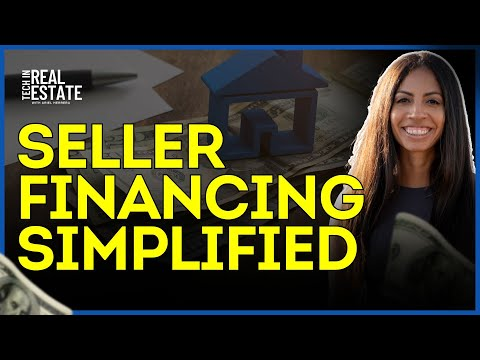

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('6xPXPqm8k9U')

## <font color="blue">Install Packages</font>

## <font color="blue">Imports</font>

In [2]:
import pandas as pd

## <font color="blue">Functions</font>

In [3]:
def seller_financing_calculator(sale_price, down_payment_rate, annual_interest_rate, loan_term_years, balloon_due_years=None, interest_only_years=None):
        # Calculate the initial loan amount
        down_payment = int(sale_price * (down_payment_rate/100))
        loan_amount = sale_price - down_payment

        # Monthly interest rate
        monthly_interest_rate = annual_interest_rate / 100 / 12
        # Total number of payments
        total_payments = loan_term_years * 12

        # Calculate the monthly payment for a fully amortizing loan
        if monthly_interest_rate > 0:
            monthly_payment = loan_amount * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -total_payments)
        else:
            monthly_payment = loan_amount / total_payments

        # Create amortization table
        amortization_table = []
        balance = loan_amount
        for month in range(1, total_payments + 1):
            interest_payment = balance * monthly_interest_rate
            if interest_only_years and month <= interest_only_years * 12:
                principal_payment = 0
                monthly_payment_during_interest_only = loan_amount * monthly_interest_rate
                amortization_table.append([month, monthly_payment_during_interest_only, interest_payment, principal_payment, balance])
            else:
                principal_payment = monthly_payment - interest_payment
                balance -= principal_payment
                amortization_table.append([month, monthly_payment, interest_payment, principal_payment, max(balance, 0)])

            if balloon_due_years and month == balloon_due_years * 12:
                balloon_payment = balance
                amortization_table.append([month, monthly_payment, interest_payment, principal_payment, 0])
                break

        # Convert amortization table to DataFrame for better display
        df_amortization_table = pd.DataFrame(amortization_table, columns=["Month", "Monthly Payment", "Interest", "Principal", "Remaining Balance"])

        # Total interest paid
        total_interest_paid = df_amortization_table["Interest"].sum()

        # Total payments
        total_payments_made = df_amortization_table["Monthly Payment"].sum() + (balloon_payment if balloon_due_years else 0)

        return {
            "Down Payment": down_payment,
            "Balloon Amount": df_amortization_table.iloc[-2]['Remaining Balance'],
            "Monthly Payment Interest Only": round(df_amortization_table.iloc[0]['Monthly Payment'], 2),
            "Monthly Payment Non Interest Only": round(df_amortization_table.iloc[-1]['Monthly Payment'], 2),
            "Monthly Payment": round(monthly_payment, 2),
            "Total Interest Paid": round(total_interest_paid, 2),
            "Total Payment Amount": round(total_payments_made, 2),
            "Amortization Table": df_amortization_table.iloc[:-1]
        }

## <font color="blue">Locals & Constants</font>

## <font color="blue">Calculate Seller Finance Terms</font>
<b>Parameters</b>
- sale_price = 379900
- down_payment_rate = 10
- annual_interest_rate = 3.5
- loan_term_years = 30
- balloon_due_years = 5
- interest_only_years = False

### <font color="green">Breakdown</font>

Step 1: Setting Up the Initial Loan Amount

In [4]:
# Parameters
sale_price = 379900
down_payment_rate = 10

# Calculate the initial loan amount
down_payment = int(sale_price * (down_payment_rate / 100))
loan_amount = sale_price - down_payment

# Print results
print(f"Down Payment: ${down_payment:0,.0f}")
print(f"Loan Amount: ${loan_amount:0,.0f}")

Down Payment: $37,990
Loan Amount: $341,910


Step 2: Calculating Monthly Payments

In [5]:
# Additional Parameters
annual_interest_rate = 3.5
loan_term_years = 30

# Monthly interest rate
monthly_interest_rate = annual_interest_rate / 100 / 12
# Total number of payments
total_payments = loan_term_years * 12

# Calculate the monthly payment for a fully amortizing loan
if monthly_interest_rate > 0:
    monthly_payment = loan_amount * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -total_payments)
else:
    monthly_payment = loan_amount / total_payments

# Print results
print(f"Monthly Payment: ${monthly_payment:0,.2f}")

Monthly Payment: $1,535.33


Step 3: Creating the Amortization Table

In [6]:
# Create amortization table
amortization_table = []
balance = loan_amount
for month in range(1, total_payments + 1):
    interest_payment = balance * monthly_interest_rate
    principal_payment = monthly_payment - interest_payment
    balance -= principal_payment
    amortization_table.append([month, round(monthly_payment, 2), round(interest_payment, 2), round(principal_payment, 2), max(round(balance, 2), 0)])

# Convert amortization table to DataFrame for better display
df_amortization_table = pd.DataFrame(amortization_table, columns=["Month", "Monthly Payment", "Interest", "Principal", "Remaining Balance"])

# Print the first few rows of the amortization table
df_amortization_table.head()

,Month,Monthly Payment,Interest,Principal,Remaining Balance
0,1,1535.33,997.24,538.09,341371.91
1,2,1535.33,995.67,539.66,340832.25
2,3,1535.33,994.09,541.23,340291.01
3,4,1535.33,992.52,542.81,339748.20
4,5,1535.33,990.93,544.40,339203.80


Step 4: Handling Balloon Payments and Interest-Only Periods

In [7]:
# Additional Parameters
balloon_due_years = 5
interest_only_years = False

# Adjust amortization table for balloon payment
if balloon_due_years:
    total_payments_balloon = balloon_due_years * 12
    amortization_table_balloon = amortization_table[:total_payments_balloon]
    balloon_payment = amortization_table_balloon[-1][-1]
    amortization_table_balloon[-1][-1] = 0  # Remaining balance is 0 after balloon payment

    # Convert to DataFrame
    df_amortization_table = pd.DataFrame(amortization_table_balloon, columns=["Month", "Monthly Payment", "Interest", "Principal", "Remaining Balance"])

    # Print the first few rows of the adjusted amortization table
    print(df_amortization_table.head())
    print(f"Balloon Payment: ${balloon_payment:0,.2f}")

# Total interest paid
total_interest_paid = df_amortization_table["Interest"].sum()
print(f"Total Interest Paid: ${total_interest_paid:0,.2f}")

# Total payments
total_payments_made = df_amortization_table["Monthly Payment"].sum() + (balloon_payment if balloon_due_years else 0)
print(f"Total Payment Amount: ${total_payments_made:0,.2f}")

   Month  Monthly Payment  Interest  Principal  Remaining Balance
0      1          1535.33    997.24     538.09          341371.91
1      2          1535.33    995.67     539.66          340832.25
2      3          1535.33    994.09     541.23          340291.01
3      4          1535.33    992.52     542.81          339748.20
4      5          1535.33    990.93     544.40          339203.80
Balloon Payment: $306,683.26
Total Interest Paid: $56,893.00
Total Payment Amount: $398,803.06


### <font color="green">Function</font>

In [8]:
results = seller_financing_calculator(sale_price, down_payment_rate, annual_interest_rate, loan_term_years, balloon_due_years, interest_only_years)

In [9]:
results.keys()

dict_keys(['Down Payment', 'Balloon Amount', 'Monthly Payment Interest Only', 'Monthly Payment Non Interest Only', 'Monthly Payment', 'Total Interest Paid', 'Total Payment Amount', 'Amortization Table'])

In [10]:
print('Down payment: ${:0,.0f}'.format(results['Down Payment']))
print('Balloon amount: ${:0,.0f}'.format(results['Balloon Amount']))
print('Monthly payment interest only: ${:0,.0f}'.format(results['Monthly Payment Interest Only']))
print('Monthly payment non interest only: ${:0,.0f}'.format(results['Monthly Payment Non Interest Only']))
print('Monthly payment non interest only: ${:0,.0f}'.format(results['Monthly Payment Non Interest Only']))
print('Total interest paid: ${:0,.0f}'.format(results['Total Interest Paid']))
print('Total payment amount: ${:0,.0f}'.format(results['Total Payment Amount']))

Down payment: $37,990
Balloon amount: $306,683
Monthly payment interest only: $1,535
Monthly payment non interest only: $1,535
Monthly payment non interest only: $1,535
Total interest paid: $57,789
Total payment amount: $400,338


## <font color="blue">Transformations</font>

In [11]:
pd.DataFrame(results['Amortization Table']).head(12)

,Month,Monthly Payment,Interest,Principal,Remaining Balance
0,1,1535.328692,997.237500,538.091192,341371.908808
1,2,1535.328692,995.668067,539.660625,340832.248183
2,3,1535.328692,994.094057,541.234635,340291.013548
3,4,1535.328692,992.515456,542.813236,339748.200312
4,5,1535.328692,990.932251,544.396441,339203.803871
5,6,1535.328692,989.344428,545.984264,338657.819607
6,7,1535.328692,987.751974,547.576718,338110.242889
7,8,1535.328692,986.154875,549.173817,337561.069072
8,9,1535.328692,984.553118,550.775574,337010.293498
9,10,1535.328692,982.946689,552.382003,336457.911495


## <font color="blue">🚨 Find Seller Financing Deals 🚨</font>
Check out [Coffee Clozers Creative](https://bit.ly/4eXBKcB) - Creative Finance on EASY Mode
![](https://drive.google.com/uc?export=view&id=1-qydykWWi9NpDZcyTcqhRvzN2KLJHTN0)

# End Notebook